In [53]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [54]:
train = pd.read_csv("src/Data/TrainSet.csv").iloc[:, 1:].dropna()
train.tail()

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
187,2022 Q4,2.6,6.5,2.2,6.4,3.6,4.2,4.0,4.1,3.9,6.1,6.7,6.8,38520.6,295.9,350.0,33.6
188,2023 Q1,2.2,6.3,10.8,15.5,3.5,3.8,4.6,3.8,3.7,5.6,6.4,7.7,41136.6,299.4,347.0,26.5
189,2023 Q2,2.1,3.8,3.3,5.8,3.6,2.7,5.1,3.7,3.7,5.7,6.5,8.2,44411.5,303.0,354.0,20.1
190,2023 Q3,4.9,8.3,0.3,2.9,3.7,3.6,5.3,4.3,4.2,6.0,7.0,8.4,42788.7,309.3,348.9,18.9
191,2023 Q4,1.5,3.6,2.2,4.4,3.7,2.8,5.3,4.5,4.5,6.2,7.3,8.5,47787.5,310.5,348.9,21.7


In [55]:
test = pd.read_csv("src/Data/TestSet.csv").iloc[:, 1:]
test.head()

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
0,2024 Q1,-11.6,-9.9,-7.8,-6.0,5.6,2.3,2.1,0.4,1.1,5.8,4.0,5.1,26130.6,261.4,338.5,65.0
1,2024 Q2,-6.7,-5.7,-4.0,-2.8,6.8,1.5,0.2,0.3,0.8,6.3,3.7,3.2,22761.8,241.1,328.0,70.0
2,2024 Q3,-8.0,-7.1,-4.2,-3.2,8.1,1.3,0.1,0.4,0.8,6.5,3.8,3.1,21799.3,225.4,314.0,61.4
3,2024 Q4,-5.9,-5.1,-2.9,-1.8,9.2,1.3,0.1,0.5,0.8,6.6,3.8,3.1,21318.0,214.0,293.1,54.5
4,2025 Q1,-1.8,-0.7,-0.1,1.1,9.7,1.4,0.1,0.5,0.9,6.4,3.8,3.1,22280.5,206.8,269.4,49.1


In [56]:
y = pd.read_csv("src/Data/NetInterestIncome.csv")

y['DATE'] = pd.to_datetime(y['DATE'])

y['quarter'] = y['DATE'].dt.quarter
y['year'] = y['DATE'].dt.year

y['period_quarter'] = y['year'].astype(str) + ' Q' + y['quarter'].astype(str)
y = y.drop(["DATE", "quarter", "year"], axis = 1)
y.columns = ["NII", "Date"]
y.columns

y.head()

,NII,Date
0,20875.613,1984 Q1
1,23567.774,1984 Q2
2,22446.359,1984 Q3
3,24498.354,1984 Q4
4,24868.406,1985 Q1


In [64]:
y['lag_1'] = y['NII'].shift(1)
y['lag_2'] = y['NII'].shift(2)
y['lag_3'] = y['NII'].shift(3)
y['lag_4'] = y['NII'].shift(4)
y = y.dropna()

y.head()

,NII,Date,lag_1,lag_2,lag_3,lag_4
4,24868.406,1985 Q1,24498.354,22446.359,23567.774,20875.613
5,26656.772,1985 Q2,24868.406,24498.354,22446.359,23567.774
6,27623.089,1985 Q3,26656.772,24868.406,24498.354,22446.359
7,29037.385,1985 Q4,27623.089,26656.772,24868.406,24498.354
8,28880.935,1986 Q1,29037.385,27623.089,26656.772,24868.406


In [57]:
merged_df = pd.merge(train, y, how = "inner", on = "Date")

# Plot Training Set and Forecast Scenario 

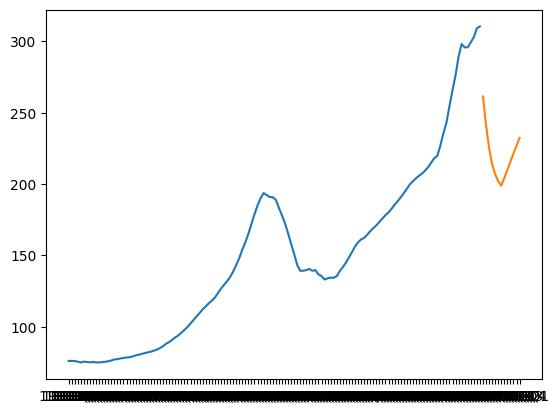

In [58]:
plt.plot(merged_df["Date"], merged_df["House Price Index (Level)"])
plt.plot(test["Date"], test["House Price Index (Level)"])
plt.show()

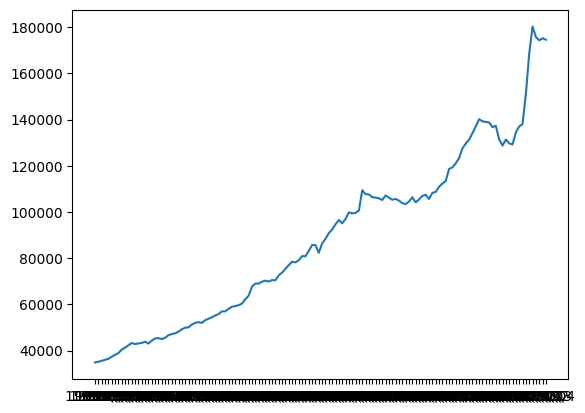

In [59]:
plt.plot(merged_df["Date"], merged_df["NII"])
plt.show()

In [60]:
X_train = merged_df["House Price Index (Level)"].pct_change(1).dropna()
y_train = merged_df["NII"].pct_change(1).dropna() 

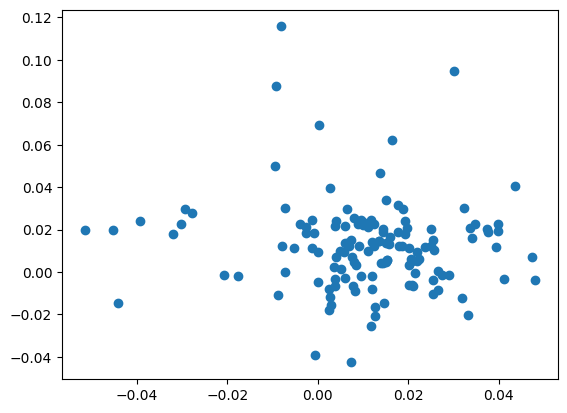

In [61]:
plt.scatter(X_train, y_train)
plt.show()